**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
# Import packages
import numpy as np
from scipy import optimize
from scipy.optimize import root
import sympy as sm
from scipy.optimize import root_scalar
from sympy.solvers import solve
import matplotlib.pyplot as plt 
from scipy.optimize import minimize_scalar
import math
import random
from scipy.optimize import minimize
import scipy.optimize as opt

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2


## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

As this couldn't be solved analytically with our usual approach, we solve the problem numerically and check if this provides the same answer as plugging the baseline parameters into the function for the optimal labor supply choice. If both methods provides the same result, we have verified that the optimal labor supply choice is given by: $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [2]:
# Defining the baseline parameters from the task
p1alpha = 0.5
p1kappa = 1.0
p1nu = 1 / (2 * 16**2)
p1w = 1.0
p1tau = 0.3
p1G = np.linspace(1.0, 2.0, 2)
p1w_tilde = (1 - p1tau) * p1w
p1L_bounds = (0, 24)

# Define the utility function
def p1utility_function(p1L, p1alpha, p1tau, p1w, p1nu, p1G):
    C = p1kappa + p1w_tilde * p1L
    return np.log(C**p1alpha * p1G**(1-p1alpha)) - p1nu * p1L**2/2

# Store the highest utility value
highest_utility = float('-inf')
optimal_L = None

# Loop through values of G to find the optimal labor supply 
for G in p1G:
    result = minimize_scalar(lambda L: -p1utility_function(L, p1alpha, p1tau, p1w, p1nu, G), bounds=p1L_bounds, method='bounded')
    utility = -p1utility_function(result.x, p1alpha, p1tau, p1w, p1nu, G) 
    if utility > highest_utility:
        highest_utility = utility
        optimal_L = result.x

# Print the numerical solution
print("Numerical solution to optimal Labor Supply (L*): {:.3f}".format(optimal_L))


Numerical solution to optimal Labor Supply (L*): 15.302


Check if plugging into the formula provides the same answer as the numerical solution, to verify the optimal labor supply choice.

In [3]:
# Calculate optimal labor supply for each value of G
for G in p1G:
    optimal_plug = (-p1kappa + np.sqrt(p1kappa**2 + 4 * (p1alpha / p1nu) * p1w_tilde**2)) / (2 * p1w_tilde)
    print("Plugging solution to optimal Labor Supply for G = {}: {:.3f}".format(G, optimal_plug))

# Print the numerical solution
print("Numerical solution to optimal Labor Supply (L*): {:.3f}".format(optimal_L))

Plugging solution to optimal Labor Supply for G = 1.0: 15.302
Plugging solution to optimal Labor Supply for G = 2.0: 15.302
Numerical solution to optimal Labor Supply (L*): 15.302


As the two solutions provides the same answers, we have verified that $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$ is indeed the solution.

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

To illustrate how $L^{\star}(\tilde{w})$ depends on $w$, we define the wage rate to be between 0.1 and 5, and loop through this interval of wages. Then we calculate the optimal labor supply for each of the wages, and then plot the results of optimal labor supply against the wage rate, to illustrate the relationship.

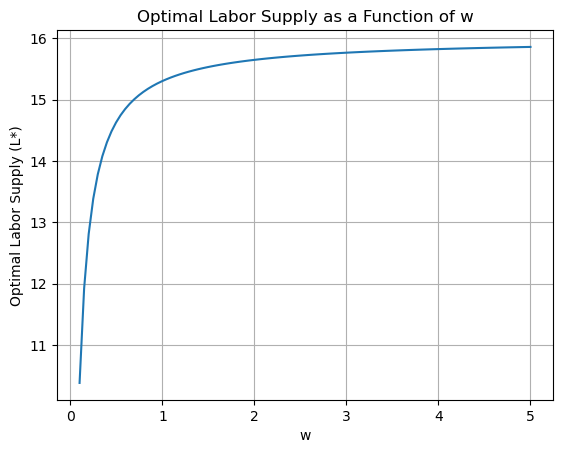

In [4]:
# Choose w values 
w_values = np.linspace(0.1, 5.0, 100)

# Calculate optimal labor supply for each value of w
optimal_L_values = []
for p1w in w_values:
    p1w_tilde_2 = (1 - p1tau) * p1w
    optimal_L = (-p1kappa + np.sqrt(p1kappa**2 + 4 * (p1alpha / p1nu) * p1w_tilde_2**2)) / (2 * p1w_tilde_2)
    optimal_L_values.append(optimal_L)

# Plot the results
plt.plot(w_values, optimal_L_values)
plt.xlabel("w")
plt.ylabel("Optimal Labor Supply (L*)")
plt.title("Optimal Labor Supply as a Function of w")
plt.grid(True)
plt.show()

The plot above illustrates the relationship between the optimal labor supply and the real wage rate, from our model. From the plot we see that the optimal labor supply is a positive but concave function of the real wage. Optimal labor supply is a positive function of the real wage rate, as a higher wate rate increase the return from working, and hence higher oppurtunity costs of leisure. These effect will induce the individuals to work more, due to the higher earnings.  

The function is concave due to several factors. The parameter nu is a parameter of disutility from working, and when working more hours the disutility increases for the individual, and hence the individual will choose to work less, ceteris paribus, due to diminishing marginal utility of additional labor supply. An increase in labor supply will also, all things equal, increase the tax payments for the individual, and thereby decrease the incentive to work more for the individual. 


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


To plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values, we create a variable which evaluates tau 100 times in the interval (0,1). We then calculate $L$, $G$ and worker utility for each of the tau values, and plot the results in three plots to show the relationship between these variables and tau.

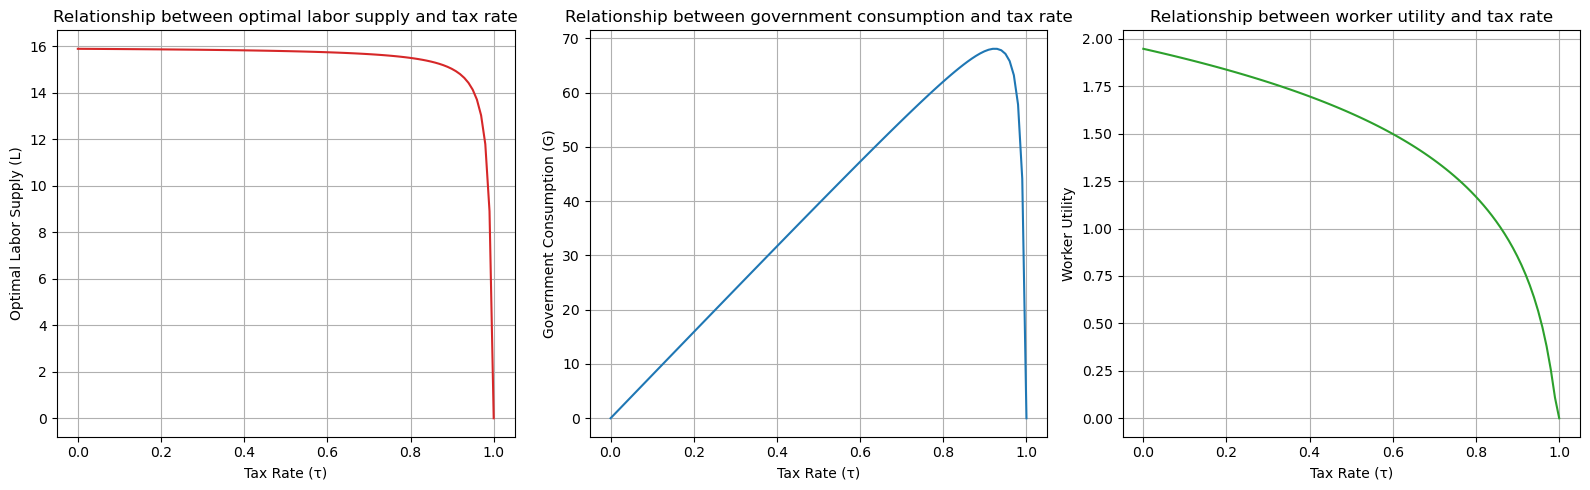

In [5]:
# Create values of tau between 0 and 1 
tau_values = np.linspace(0, 1, 100)

# Create lists to store the results
optimal_L_values2 = []
government_consumption_values = []
worker_utility_values = []

# Calculate implied L, G and worker utility for my tau values
for tau in tau_values:
    p1tau = tau
    p1w_tilde = (1 - p1tau) * p1w
    
    # Calculate optimal labor supply as earlier and append to the list
    result2 = minimize_scalar(lambda L: -p1utility_function(L, p1alpha, p1tau, p1w, p1nu, p1G[0]), bounds=p1L_bounds, method='bounded')
    optimal_L = result2.x
    optimal_L_values2.append(optimal_L)
    
    # Calculate government consumption and append to the list
    Government_con = p1tau * p1w * optimal_L
    government_consumption_values.append(Government_con)
    
    # Calculate worker utility and append to the list
    worker_utility = p1utility_function(optimal_L, p1alpha, p1tau, p1w, p1nu, p1G[0])
    worker_utility_values.append(worker_utility)

# Create subplots for optimal labor supply, government consumption, and worker utility, to be able to inspect at the same time
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))

# Plot Optimal Labor Supply
axes[0].plot(tau_values, optimal_L_values2, color='tab:red')
axes[0].set_xlabel('Tax Rate (τ)')
axes[0].set_ylabel('Optimal Labor Supply (L)')
axes[0].set_title('Relationship between optimal labor supply and tax rate')
axes[0].grid(True)

# Plot Government Consumption
axes[1].plot(tau_values, government_consumption_values, color='tab:blue')
axes[1].set_xlabel('Tax Rate (τ)')
axes[1].set_ylabel('Government Consumption (G)')
axes[1].set_title('Relationship between government consumption and tax rate')
axes[1].grid(True)

# Plot Worker Utility
axes[2].plot(tau_values, worker_utility_values, color='tab:green')
axes[2].set_xlabel('Tax Rate (τ)')
axes[2].set_ylabel('Worker Utility')
axes[2].set_title('Relationship between worker utility and tax rate')
axes[2].grid(True)

# Adjust plots
plt.tight_layout()

# Display plots
plt.show()

**Intuition to the plots:**

                                         Optimal Labor supply vs. Tax Rate
The plot illustrates optimal labor supply for a labor income tax-rate between 0% and 100%. The plot illustrates a negative relationship, as a higher labor income tax rate will decrease the optimal labor supply. This is because as the tax rate increases, the net income for the worker decreases, and hence the incentive to work decreases. 

                                        Government Consumption vs. Tax Rate
The plot illustrates government consumption for a labor income tax-rate between 0% and 100%. The plot illustrate that government consumption is increasing in the tax rate until the tax rate is around 90%, and after this point government consumption is decreasing in the tax rate. This is because up until a sufficiently high value of the tax rate, the government revenue increases, but then at some point the decrease in the optimal labor supply will dominate, and hence the government revenue will decrease, implying a decrease in government consumption. In this model we assume that all government revenue is allocated to government consumption, and for this reason we have full impact from government revenue to government consumption.

                                            Worker Utility vs. Tax rate
The plot illustrates worker utility for a labor income tax-rate between 0% and 100%. The plot illustrate a negative relationship, as a higher labor income tax-rate will decrease worker utility. A higher tax rate will decrease the net income and hence decrease worker utility. 


**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

To find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility, we now define a function for social utility function.  The social utility is the sum of utilities for the workers, which takes into account the wage, their labor supply, the tax rate, and benefits they get from public consumption. We hereby find the optimal labor supply for a given tax rate and calculate the utility from this labor supply. To find the socially optimal tax rate we maximize the social utility function, to end up with the optimal tax rate. 

As we got some warnings for runtime, we check that values in the model are positive when taking log and the square root, and if not, we report them as close to zero.

Numerical solution to optimal tax rate (τ*): 50.505%


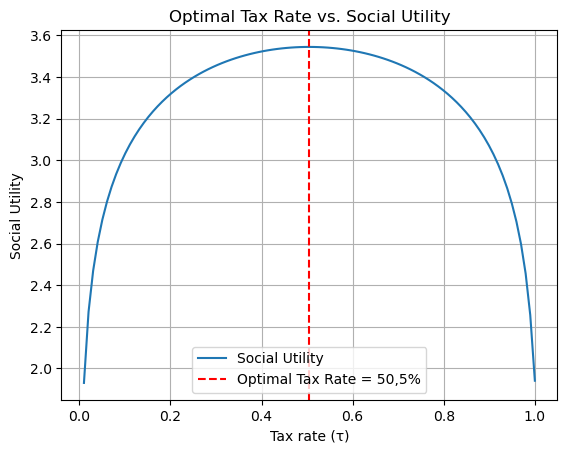

In [6]:
# Define the utility function
def q4(L, p1alpha, tau, p1w, p1nu, p1kappa, G2):
    p2 = (1 - tau) * p1w
    C4 = p1kappa + p2 * L
    G2 = tau * p1w * L
    
    if C4 <= 0 or G2 <= 0:
        return float('-inf')  # return a very low utility value
    
    return np.log(C4**p1alpha * G2**(1-p1alpha)) - ((p1nu * L**2) / 2)

# Guess of G
G2 = 1.0

# Store the highest utility value
highest_q4 = float('-inf')
optimal_tau = None

# Tau values
tau_q4 = np.linspace(0, 1, 100)

# Lists to store optimal tax rate and social utility values
optimal_tau_values = []
social_utility_values = []

# Loop through values of tau to find the optimal tax rate
for tau4 in tau_q4:
    result4 = minimize_scalar(lambda L: -q4(L, p1alpha, tau4, p1w, p1nu, p1kappa, G2), bounds=(0, 24), method='bounded')
    opt_utility = -result4.fun
    if opt_utility > highest_q4:
        highest_q4 = opt_utility
        optimal_tau = tau4
    social_utility_values.append(opt_utility)
    optimal_tau_values.append(tau4)

# Convert the optimal tax rate to percentage
optimal_tau_percentage = optimal_tau * 100

# Print the numerical solution
print("Numerical solution to optimal tax rate (τ*): {:.3f}%".format(optimal_tau_percentage))

# Plot the optimal tax rate against social utility
plt.plot(optimal_tau_values, social_utility_values, label = 'Social Utility')
plt.axvline(optimal_tau, color='red', linestyle='--', label='Optimal Tax Rate = 50,5%')
plt.xlabel('Tax rate (τ)')
plt.ylabel('Social Utility')
plt.title('Optimal Tax Rate vs. Social Utility')
plt.legend()
plt.grid(True)
plt.show()


The socially optimal tax rate that maximizes the worker utility is 50.5%, which is where the marginal benefit of government consumption is equal to the marginal cost of reduced labor supply. This socially optimal tax rate is calculated from the trade-off of government consumption and labor supply, based on the tax rate. The graph plots this trade-off. The plot illustrates how social utility depends on the tax rate, and we see that the social utility is increasing up until 50.5% and then it is decreasing. From the vertex of the curve, the curve slope is negative due to the marginal cost of reduced labor supply dominates the marginal benefit of government consumption.

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

To find the G that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4, we start by defining the new parameters in the model. Then we define the new utility function, and use this to calculate the optimal labor supply. Then we use the optimal labor supply to find the G that solve the government budget constraint. At last we calculate G for the two sets of parameter values using our optimal tax rate from question 4.

In [7]:
# Set the parameter values (Have to define them again, else it will be overwritten)
p1alpha = 0.5
p1kappa = 1.0
p1nu = 1 / (2 * 16**2)
p1w = 1.0
optimal_tau = 0.505

# Set 1 parameters
p1sigma_set1 = 1.001
p1rho_set1 = 1.001
p1epsilon_set1 = 1.0

# Set 2 parameters
p1sigma_set2 = 1.5
p1rho_set2 = 1.5
p1epsilon_set2 = 1.0

# Define the new utility function
def new_utility(L, p1alpha, p1tau, p1w, p1nu, G, p1sigma, p1rho, p1epsilon):
    C = p1kappa + (1 - p1tau) * p1w * L
    utility = ((p1alpha * C**((p1sigma - 1) / p1sigma) + (1 - p1alpha) * G**((p1sigma - 1) / p1sigma))**(p1sigma / (p1sigma - 1)))**(1 - p1rho) - 1
    utility /= 1 - p1rho
    utility -= p1nu * L**(1 + p1epsilon) / (1 + p1epsilon)
    return -utility

# Define optimal labor supply with the new utility function
def L_opt(p1w, tau, G, p1alpha, p1sigma, p1rho, p1epsilon, p1kappa, p1nu, L_guess):
    result = minimize(new_utility, L_guess, args=(p1alpha, tau, p1w, p1nu, G, p1sigma, p1rho, p1epsilon), bounds=[(0, 24)], method='L-BFGS-B')
    return result.x[0]

# Define the equation for finding G
def equation_G(G, tau, p1alpha, p1sigma, p1rho, p1epsilon, p1kappa, p1nu, L_guess):
    L_star = L_opt(p1w, tau, G, p1alpha, p1sigma, p1rho, p1epsilon, p1kappa, p1nu, L_guess)
    return G - tau * p1w * L_star

# Define an initial guess for L
L_guess = 0.5

# Find G for Set 1
G_set1 = root_scalar(equation_G, args=(optimal_tau, p1alpha, p1sigma_set1, p1rho_set1, p1epsilon_set1, p1kappa, p1nu, L_guess), method='brentq', bracket=(0, 100)).root

# Find G for Set 2
G_set2 = root_scalar(equation_G, args=(optimal_tau, p1alpha, p1sigma_set2, p1rho_set2, p1epsilon_set2, p1kappa, p1nu, L_guess), method='brentq', bracket=(0, 100)).root

# Print the values of tau, p1w, L_star, and G for both sets
print("Set 1:")
print("Optimal Tau from q4: {:.3f}".format(optimal_tau))
print("p1w: {:.3f}".format(p1w))
L_star_set1 = L_opt(p1w, optimal_tau, G_set1, p1alpha, p1sigma_set1, p1rho_set1, p1epsilon_set1, p1kappa, p1nu, L_guess)
print("L_star: {:.3f}".format(L_star_set1))
print("G: {:.3f}".format(G_set1))

print("\nSet 2:")
print("Optimal Tau from q4: {:.3f}".format(optimal_tau))
print("p1w: {:.3f}".format(p1w))
L_star_set2 = L_opt(p1w, optimal_tau, G_set2, p1alpha, p1sigma_set2, p1rho_set2, p1epsilon_set2, p1kappa, p1nu, L_guess)
print("L_star: {:.3f}".format(L_star_set2))
print("G: {:.3f}".format(G_set2))


Set 1:
Optimal Tau from q4: 0.505
p1w: 1.000
L_star: 15.004
G: 7.578

Set 2:
Optimal Tau from q4: 0.505
p1w: 1.000
L_star: 9.708
G: 4.903


From the parameter values in set 1 we get G=7.578 and from the parameter values in set 2 we get G=4.903. From this we notice that the parameter values in set 1 implies larger government consumption. This equation is for balancing government consumption with revenue from taxes on labor.  

In the new model we can interpret $\sigma$ as elasticity of substitution between $C$ and $G$, $\rho$ as relative risk aversion, and $\epsilon$ as elasticity of substitution between leisure and consumption. From the sets of parameter values we saw that an increase in sigma and rho implies a larger government consumption to keep the government budget constraint binding. Higher $\sigma$ implies that the worker to a larger degree is able to substitute from private consumption to government consumption. Higher $\rho$ implies more risk aversion, and hence workers prefer more government consumption as this more stable and predictable.

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

To find the socially optimal tax rate $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$ we solve for the value of G that satisfies the government budget constraint. Then we solve for the optimal labor supply for given tau and G. We do this first for the parameter values in set 1 and then for the parameter values in set 2. At last we print the results. 

In [8]:
# Solve the socially optimal tax rate for the parameter values in set 1

# Set the parameter values for Set 1
p1alpha = 0.5
p1kappa = 1.0
p1nu = 1 / (2 * 16**2)
p1w = 1.0
p1sigma_set1 = 1.001
p1rho_set1 = 1.001
p1epsilon_set1 = 1.0

# Define the utility function for Set 1
def utility_set1(L, p1alpha, p1tau, p1w, p1nu, G, p1sigma, p1rho, p1epsilon):
    C = p1kappa + (1 - p1tau) * p1w * L
    utility = ((p1alpha * C**((p1sigma - 1) / p1sigma) + (1 - p1alpha) * G**((p1sigma - 1) / p1sigma))**(p1sigma / (p1sigma - 1)))**(1 - p1rho) - 1
    utility /= 1 - p1rho
    utility -= p1nu * L**(1 + p1epsilon) / (1 + p1epsilon)
    return utility

# Define the equation for finding G for Set 1
def equation_G_set1(G, p1tau, p1w, p1alpha, p1sigma, p1rho, p1epsilon, p1kappa, p1nu, L_guess):
    L_star = minimize_scalar(lambda L: -utility_set1(L, p1alpha, p1tau, p1w, p1nu, G, p1sigma, p1rho, p1epsilon), bounds=(0, 24), method='bounded').x
    return G - p1tau * p1w * L_star 

# Iterate over values of tau to find the socially optimal tax rate for Set 1
optimal_tau_set1 = None
max_utility_set1 = float('-inf')

# Create empty list for the results
optimal_tau_values_set1 = []
social_utility_values_set1 = []

for tau in np.linspace(0, 1, 100):
    G = minimize_scalar(lambda G: abs(equation_G_set1(G, tau, p1w, p1alpha, p1sigma_set1, p1rho_set1, p1epsilon_set1, p1kappa, p1nu, L_guess)), bounds=(0, 100), method='bounded').x
    L_star = minimize_scalar(lambda L: -utility_set1(L, p1alpha, tau, p1w, p1nu, G, p1sigma_set1, p1rho_set1, p1epsilon_set1), bounds=(0, 24), method='bounded').x
    utility = utility_set1(L_star, p1alpha, tau, p1w, p1nu, G, p1sigma_set1, p1rho_set1, p1epsilon_set1)

    if utility > max_utility_set1:
        max_utility_set1 = utility
        optimal_tau_set1 = tau

    # Append the result to the lists
    optimal_tau_values_set1.append(tau)
    social_utility_values_set1.append(utility)

In [9]:
# Solve the socially optimal tax rate for the parameter values in set 2

# Set the parameter values for Set 2
p1sigma_set2 = 1.5
p1rho_set2 = 1.5
p1epsilon_set2 = 1.0

# Define the utility function for Set 2
def utility_set2(L, p1alpha, p1tau, p1w, p1nu, G, p1sigma, p1rho, p1epsilon):
    C = p1kappa + (1 - p1tau) * p1w * L
    utility = ((p1alpha * C**((p1sigma - 1) / p1sigma) + (1 - p1alpha) * G**((p1sigma - 1) / p1sigma))**(p1sigma / (p1sigma - 1)))**(1 - p1rho) - 1
    utility /= 1 - p1rho
    utility -= p1nu * L**(1 + p1epsilon) / (1 + p1epsilon)
    return utility

# Define the equation for finding G for Set 2
def equation_G_set2(G, p1tau, p1w, p1alpha, p1sigma, p1rho, p1epsilon, p1kappa, p1nu, L_guess):
    L_star = minimize_scalar(lambda L: -utility_set2(L, p1alpha, p1tau, p1w, p1nu, G, p1sigma, p1rho, p1epsilon), bounds=(0, 24), method='bounded').x
    return G - p1tau * p1w * L_star 

# Iterate over different values of tau to find the socially optimal tax rate for Set 2
optimal_tau_set2 = None
max_utility_set2 = float('-inf')

# Create empty lists for the results
optimal_tau_values_set2 = []
social_utility_values_set2 = []

for tau in np.linspace(0, 1, 100):
    G = minimize_scalar(lambda G: abs(equation_G_set2(G, tau, p1w, p1alpha, p1sigma_set2, p1rho_set2, p1epsilon_set2, p1kappa, p1nu, L_guess)), bounds=(0, 100), method='bounded').x
    L_star = minimize_scalar(lambda L: -utility_set2(L, p1alpha, tau, p1w, p1nu, G, p1sigma_set2, p1rho_set2, p1epsilon_set2), bounds=(0, 24), method='bounded').x
    utility = utility_set2(L_star, p1alpha, tau, p1w, p1nu, G, p1sigma_set2, p1rho_set2, p1epsilon_set2)

    if utility > max_utility_set2:
        max_utility_set2 = utility
        optimal_tau_set2 = tau

    # Append the results to the lists
    optimal_tau_values_set2.append(tau)
    social_utility_values_set2.append(utility)

Numerical solution for Set 1:
Optimal tax rate (τ*): 51.515%

Numerical solution for Set 2:
Optimal tax rate (τ*): 46.465%


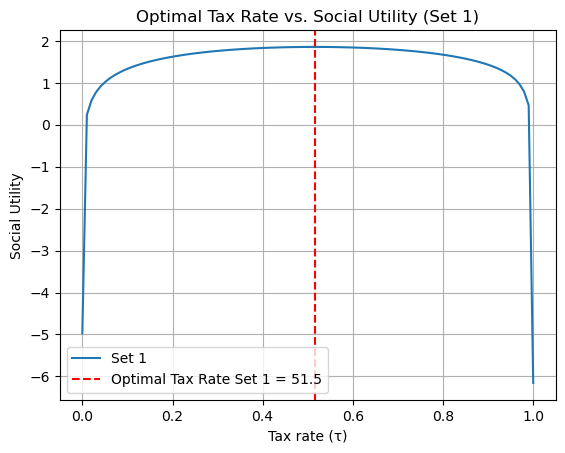

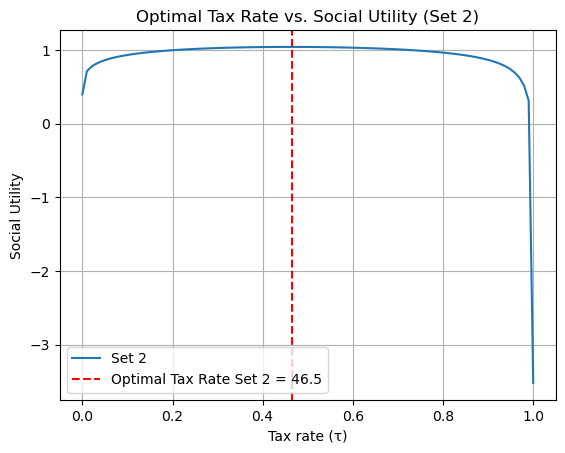

In [10]:
# Print and plot the results

# Convert the optimal tax rates to percentages
optimal_tau_set1_percentage = optimal_tau_set1 * 100
optimal_tau_set2_percentage = optimal_tau_set2 * 100

# Print the numerical solution for Set 1
print("Numerical solution for Set 1:")
print("Optimal tax rate (τ*): {:.3f}%".format(optimal_tau_set1_percentage))

# Print the numerical solution for Set 2
print("\nNumerical solution for Set 2:")
print("Optimal tax rate (τ*): {:.3f}%".format(optimal_tau_set2_percentage))

# Plot the optimal tax rate against social utility for Set 1
plt.plot(optimal_tau_values_set1, social_utility_values_set1, label='Set 1')
plt.axvline(optimal_tau_set1, color='red', linestyle='--', label='Optimal Tax Rate Set 1 = 51.5')
plt.xlabel('Tax rate (τ)')
plt.ylabel('Social Utility')
plt.title('Optimal Tax Rate vs. Social Utility (Set 1)')
plt.legend()
plt.grid(True)
plt.show()

# Plot the optimal tax rate against social utility for Set 2
plt.plot(optimal_tau_values_set2, social_utility_values_set2, label='Set 2')
plt.axvline(optimal_tau_set2, color='red', linestyle='--', label='Optimal Tax Rate Set 2 = 46.5')
plt.xlabel('Tax rate (τ)')
plt.ylabel('Social Utility')
plt.title('Optimal Tax Rate vs. Social Utility (Set 2)')
plt.legend()
plt.grid(True)
plt.show()

From the output above we see that the socially optimal tax rate is 51.5% for the parameter values $\sigma=1.001$ and $\rho=1.001$, and the socially optimal tax rate is 46.5% for the parameter values $\sigma=1.5$ and $\rho=1.5$. 

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [11]:
#define baseline parameters
p2eta = 0.5
p2omega = 1.0
p2rho = 0.90
p2lota = 0.01
p2sigmaepsilon = 0.10
p2R = (1+0.01) ** (1/12)
Delta = 0.05

In this section we try to verify numerically that the quantity of haircuts maximize profits for kappa value 1 and 2.

In [12]:
# Values of κ
kappa_values = [1.0, 2.0]

for kappa in kappa_values:
    # Calculate optimal lt for each kappa
    lt_optimal = (((1 - p2eta) * kappa) / p2omega) ** (1 / p2eta)
    
    # Calculate profits using the formula Πt = pt * yt - wl_t
    profit = kappa * lt_optimal ** (1 - p2eta) - p2omega * lt_optimal
    
    print(f"For κ = {kappa}:")
    print(f"Optimal lt: {lt_optimal}")
    print(f"Profit: {profit}\n")


For κ = 1.0:
Optimal lt: 0.25
Profit: 0.25

For κ = 2.0:
Optimal lt: 1.0
Profit: 1.0



the kappa value represent different demand shocks which can be seen in different output when kappa equals 1 and 2. $\Pi_t = \kappa_t \ell_{t,\text{optimal}}^{1-\eta} - w \ell_{t,\text{optimal}}$ this equation show the profit obatined when the optimal quantity of harcuts is produced. we demonstrate numerically that hairdresser´s profit is maximized when they choose the quantity of haircuts $\ell_t$ that satisfy first-order condition of profit maximization. as seen above we calculated profits for different $\kappa$ value and comparing them to the theory whcih is the optimal quantity we can confirm that hairdresser indeed maximizes profits.

We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [20]:
# Number of simulations
K = 100
#set seed
random.seed(123)

def ar1_process(log_kappa0, t):
    if t == 0:
        return log_kappa0
    else:
        ϵ = random.gauss(-0.5 * p2sigmaepsilon ** 2, p2sigmaepsilon)
        return p2rho * ar1_process(log_kappa0, t-1) + ϵ

def h(ϵ_list):
    lt_minus_1 = 0
    cumulative_sum = 0
    
    for t in range(120):
        log_kappa_t = ar1_process(0, t)
        kappa_t = math.exp(log_kappa_t)
        lt = ((1 - p2eta) * kappa_t / p2omega) ** (1 / p2eta)
        profit = kappa_t * lt ** (1 - p2eta) - p2omega * lt - (lt != lt_minus_1) * p2lota
        cumulative_sum += p2R ** -t * profit
        lt_minus_1 = lt
    
    return cumulative_sum

# Calculate H
H = sum(h([ar1_process(0, t) for t in range(120)]) for _ in range(K)) / K

print(f"Ex ante expected value of the salon (H): {H:.3f}")


Ex ante expected value of the salon (H): 27.861


in this section we try to simulate the expected value by repeatedly generating new sets of demand shocks and averaging them over multiple simulations. this provide an estimate of the expected profitability of the salon over time when we considering the uncertanity in the demand shock the value of 27.861 means that on average the salon is expected to achive a profitability level of 27.861 units, this have to been taking into account for the uncertain nature of the demand shock and the hairdresser´s optimal choices.

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [21]:
# Set the seed
random.seed(123)

# Number of simulations
K = 100

def ar1_process(log_kappa0, t):
    if t == 0:
        return log_kappa0
    else:
        ϵ = random.gauss(-0.5 * p2sigmaepsilon ** 2, p2sigmaepsilon)
        return p2rho * ar1_process(log_kappa0, t-1) + ϵ

def h(ϵ_list, delta):
    lt_minus_1 = 0
    cumulative_sum = 0
    
    for t in range(120):
        log_kappa_t = ar1_process(0, t)
        kappa_t = math.exp(log_kappa_t)
        lt_ast = ((1 - p2eta) * kappa_t / p2omega) ** (1 / p2eta)
        
        if abs(lt_minus_1 - lt_ast) > delta:
            lt = lt_ast
        else:
            lt = lt_minus_1
        
        profit = kappa_t * lt ** (1 - p2eta) - p2omega * lt - (lt != lt_minus_1) * p2lota
        cumulative_sum += p2R ** -t * profit
        lt_minus_1 = lt
    
    return cumulative_sum

# Calculate H with delta = 0.05
delta = 0.05
H = sum(h([ar1_process(0, t) for t in range(120)], delta) for _ in range(K)) / K

print(f"Ex ante expected value of the salon (H) with delta = {delta}: {H:.3f}")


Ex ante expected value of the salon (H) with delta = 0.05: 28.150


In this section we introduce a threshold "delta = 0.05" that controls how quickly the optimal choices of $\ell_t$ can change. with the new threshold we got a H value of 28.150 which mean that the expected value of salon is 28.150 on average the salon is expected to achieve a profitability of 28.150 unit considering the threshold for the updated optimal choice of $\ell_t$.

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

This code can take a bit time to run due to the mutiple number of simulations of calculation H for given delta.

Ex ante expected value of the salon (H) with delta = 0.0: 27.861
Ex ante expected value of the salon (H) with delta = 0.01: 27.657
Ex ante expected value of the salon (H) with delta = 0.02: 27.527
Ex ante expected value of the salon (H) with delta = 0.03: 27.902
Ex ante expected value of the salon (H) with delta = 0.04: 27.890
Ex ante expected value of the salon (H) with delta = 0.05: 28.002
Ex ante expected value of the salon (H) with delta = 0.06: 28.081
Ex ante expected value of the salon (H) with delta = 0.07: 27.975
Ex ante expected value of the salon (H) with delta = 0.08: 28.142
Ex ante expected value of the salon (H) with delta = 0.09: 28.020
Ex ante expected value of the salon (H) with delta = 0.1: 27.958
Ex ante expected value of the salon (H) with delta = 0.11: 27.963
Ex ante expected value of the salon (H) with delta = 0.12: 27.985
Ex ante expected value of the salon (H) with delta = 0.13: 28.119
Ex ante expected value of the salon (H) with delta = 0.14: 28.166
Ex ante expe

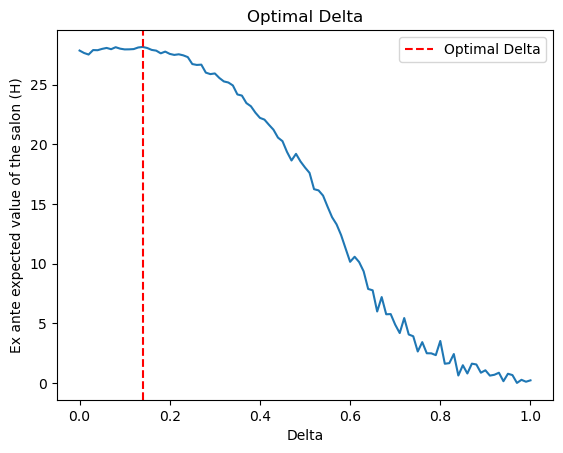

In [22]:
# Number of simulations
K = 100

# Set the seed
random.seed(123)

# Function to simulate AR(1) process
def ar1_process(log_kappa0, t):
    if t == 0:
        return log_kappa0
    else:
        ϵ = random.gauss(-0.5 * p2sigmaepsilon ** 2, p2sigmaepsilon)
        return p2rho * ar1_process(log_kappa0, t-1) + ϵ

# Function to calculate h
def h(ϵ_list, delta):
    lt_minus_1 = 0
    cumulative_sum = 0
    
    for t in range(120):
        log_kappa_t = ar1_process(0, t)
        kappa_t = math.exp(log_kappa_t)
        lt_ast = ((1 - p2eta) * kappa_t / p2omega) ** (1 / p2eta)
        
        if abs(lt_minus_1 - lt_ast) > delta:
            lt = lt_ast
        else:
            lt = lt_minus_1
        
        profit = kappa_t * lt ** (1 - p2eta) - p2omega * lt - (lt != lt_minus_1) * p2lota
        cumulative_sum += p2R ** -t * profit
        lt_minus_1 = lt
    
    return cumulative_sum

# Calculate H for different values of delta
delta_values = np.linspace(0, 1, 101)  # Adjust the number of values as needed
H_values = []

for delta in delta_values:
    H = sum(h([ar1_process(0, t) for t in range(120)], delta) for _ in range(K)) / K
    H_values.append(H)
    print(f"Ex ante expected value of the salon (H) with delta = {delta}: {H:.3f}")

# Find the optimal delta
optimal_delta = delta_values[H_values.index(max(H_values))]
print("Optimal Delta:", optimal_delta)

# Plot the results
plt.plot(delta_values, H_values)
plt.axvline(x=optimal_delta, color='r', linestyle='--', label='Optimal Delta')
plt.xlabel('Delta')
plt.ylabel('Ex ante expected value of the salon (H)')
plt.title('Optimal Delta')
plt.legend()
plt.show()



By simulation the AR(1) we try to calculate the best profit for given delta value. this proces is repeated K=100 times to obtain average value of H. we got the optimal delta=0.14 with H=28.1659. which mean the expected value of the salon is the best choice when delta = 0.14.


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



Lower the minimum wage for the salons

In [23]:
# Set seed
random.seed(123)

# Function to simulate AR(1) process
def ar1_process(log_kappa0, t):
    if t == 0:
        return log_kappa0
    else:
        ϵ = random.gauss(-0.5 * p2sigmaepsilon ** 2, p2sigmaepsilon)
        return p2rho * ar1_process(log_kappa0, t-1) + ϵ

# Alternative policy function with dynamic threshold and modified minimum wage
def alternative_policy(t, kappa_t, lt_previous, profit_previous):
    global p2omega_modified  # Declare the variable as global
    
    p2omega_modified = 0.95  # Modify the minimum wage as desired
    
    lt_ast = ((1 - p2eta) * kappa_t / p2omega_modified) ** (1 / p2eta)
    
    # Adjust the threshold (Delta) based on previous profitability
    delta_adjusted = Delta + 0.02 * profit_previous
    
    # Adjust the number of hairdressers based on the comparison of lt_ast and lt_previous
    if abs(lt_previous - lt_ast) > delta_adjusted:
        lt = lt_ast
    else:
        lt = lt_previous
    
    return lt

# Function to calculate h using the alternative policy
def h_alternative(ϵ_list):
    lt_previous = 0
    cumulative_sum = 0
    profit_previous = 0
    
    for t in range(120):
        log_kappa_t = ar1_process(0, t)
        kappa_t = math.exp(log_kappa_t)
        lt = alternative_policy(t, kappa_t, lt_previous, profit_previous)
        profit = kappa_t * lt ** (1 - p2eta) - p2omega_modified * lt - (lt != lt_previous) * p2lota
        cumulative_sum += p2R ** -t * profit
        lt_previous = lt
        profit_previous = profit
    
    return cumulative_sum


# Calculate H for the alternative policy
H_alternative = sum(h_alternative([ar1_process(0, t) for t in range(120)]) for _ in range(K)) / K

print(f"Ex ante expected value of the salon (H) with alternative policy: {H_alternative:.3f}")



Ex ante expected value of the salon (H) with alternative policy: 29.673


With a lower policy wage gives a impact of reducing cost of labor on the profitability of the salon. by lowering the minimum wage is expected that the salon can operate with lower labor cost which improve profitability and increasing the expected value of the salon.

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [17]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

the optimizer aims to find the global minimum of the Griewank function by multiple inital points and refining them iteratively, where random initial points are chosen within the given bonds. we use BFGS optimizer to effective initial guess and aiming to minimize Griewank function. 

Optimal solution:
x_ast = [-3.48928313e-09 -1.06064850e-08]
f(x_ast) = 0.0


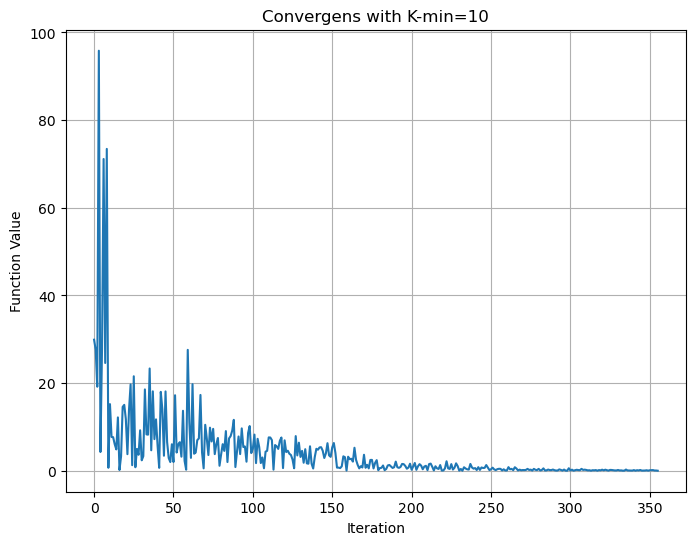

In [18]:
def refined_global_optimizer(bounds, tau, K_warmup, K_max, seed=None):
    if seed is not None:
        np.random.seed(seed)
    
    x_ast = None
    x_ast_val = None
    f_hist = []
    
    for k in range(K_max):
        x_k = np.random.uniform(bounds[0], bounds[1], size=2)
        
        if k >= K_warmup:
            chi_k = 0.5 * 2 / (1 + np.exp((k - K_warmup) / 100))
            x_k0 = chi_k * x_k + (1 - chi_k) * x_ast if x_ast is not None else x_k
        else:
            x_k0 = x_k
        
        res = opt.minimize(griewank, x_k0, method='BFGS', tol=tau)
        f_hist.append(res.fun)
        
        if x_ast is None or res.fun < x_ast_val:
            x_ast = res.x
            x_ast_val = res.fun
        
        if x_ast_val < tau:
            break
    
    return x_ast, f_hist

# Settings
bounds = [-600, 600]
tau = 1e-8
K_warmup = 10
K_max = 1000
seed = 123

# Run optimizer
x_ast, f_hist = refined_global_optimizer(bounds, tau, K_warmup, K_max, seed=seed)

print("Optimal solution:")
print("x_ast =", x_ast)
print("f(x_ast) =", griewank(x_ast))

# Plot history of function values
plt.figure(figsize=(8, 6))
plt.plot(f_hist)
plt.xlabel('Iteration')
plt.ylabel('Function Value')
plt.title('Convergens with K-min=10')
plt.grid(True)
plt.show()


**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

Optimal solution:
x_ast = [ 8.99597776e-10 -3.16091995e-08]
f(x_ast) = 2.220446049250313e-16


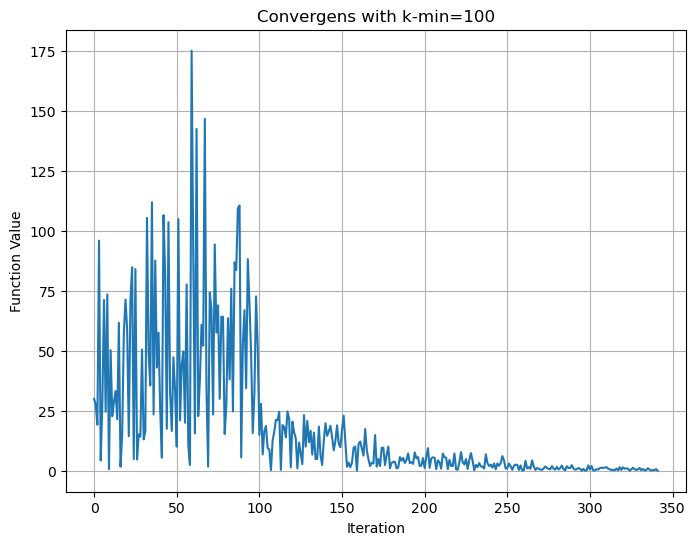

In [19]:
def refined_global_optimizer(bounds, tau, K_warmup, K_max, seed=None):
    if seed is not None:
        np.random.seed(seed)
    
    x_ast = None
    x_ast_val = None
    f_hist = []
    
    for k in range(K_max):
        x_k = np.random.uniform(bounds[0], bounds[1], size=2)
        
        if k >= K_warmup:
            chi_k = 0.5 * 2 / (1 + np.exp((k - K_warmup) / 100))
            x_k0 = chi_k * x_k + (1 - chi_k) * x_ast if x_ast is not None else x_k
        else:
            x_k0 = x_k
        
        res = opt.minimize(griewank, x_k0, method='BFGS', tol=tau)
        f_hist.append(res.fun)
        
        if x_ast is None or res.fun < x_ast_val:
            x_ast = res.x
            x_ast_val = res.fun
        
        if x_ast_val < tau:
            break
    
    return x_ast, f_hist

# Settings
bounds = [-600, 600]
tau = 1e-8
K_warmup = 100
K_max = 1000
seed = 123

# Run optimizer
x_ast, f_hist = refined_global_optimizer(bounds, tau, K_warmup, K_max, seed=seed)

print("Optimal solution:")
print("x_ast =", x_ast)
print("f(x_ast) =", griewank(x_ast))

# Plot history of function values
plt.figure(figsize=(8, 6))
plt.plot(f_hist)
plt.xlabel('Iteration')
plt.ylabel('Function Value')
plt.title('Convergens with k-min=100')
plt.grid(True)
plt.show()


As seen in the previous section 3.1 and 3.2 should we try to seek the convergens when k=10 and k=100. when k=10 the warm-up phase is relatively short and allowing the optimizer to explore solution space to some extent. when K=100 the warm-up phase i longer and providing more opportunities for exploration. high number of warm-up iterations allows us to explore the solution space more thoroughly to make more informed initial guesses. by comparing the iterations we can see which one leads to the fastes convergens, the model with less iterations got the fastes convergens if we compare graphically we can see K=100 got fewer iterations than K=10 which mean k=100 lead to faster convergence. have to notice the seed number can change the intuition behind the convergence so k=10 can have faster convergence than k=100.